# paper numbers

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pickle 


import matplotlib as mpl
import matplotlib.patches as mpatches
from matplotlib import cm
from matplotlib.colors import Normalize 
from scipy.interpolate import interpn
from sklearn.preprocessing import MinMaxScaler, StandardScaler

from astropy.io import fits
from astropy.table import Table

from tqdm import tqdm
import os
import sys


def mkdir(directory_path): 
    if os.path.exists(directory_path): 
        return directory_path
    else: 
        try: 
            os.makedirs(directory_path)
        except: 
            # in case another machine created the path meanwhile !:(
            return sys.exit("Erro ao criar diretório") 
        return directory_path


def open_fits_catalog(fits_file):
    hdu_list=fits.open(fits_file, ignore_missing_end=True)
    #print hdu_list
    hdu = hdu_list[1]    # table extensions can't be the first extension, so there's a dummy image extension at 0
    #print hdu.header
    cat_table = Table(hdu.data)
    cols=hdu.columns
    return cat_table

    
def plt_style():
    plt.rcParams.update({
                        'lines.linewidth':1.0,
                        'lines.linestyle':'-',
                        'lines.color':'black',
                        'font.family':'serif',
                        'font.weight':'normal',
                        'font.size':22.0,
                        'text.color':'black',
                        'text.usetex':True,
                        'axes.edgecolor':'black',
                        'axes.linewidth':1.0,
                        'axes.grid':False,
                        'axes.titlesize':'x-large',
                        'axes.labelsize':'x-large',
                        'axes.labelweight':'normal',
                        'axes.labelcolor':'black',
                        'axes.formatter.limits':[-4,4],
                        'xtick.major.size':7,
                        'xtick.minor.size':4,
                        'xtick.major.pad':8,
                        'xtick.minor.pad':8,
                        'xtick.labelsize':'medium',
                        'xtick.minor.width':1.0,
                        'xtick.major.width':1.0,
                        'ytick.major.size':7,
                        'ytick.minor.size':4,
                        'ytick.major.pad':8,
                        'ytick.minor.pad':8,
                        'ytick.labelsize':'medium',
                        'ytick.minor.width':1.0,
                        'ytick.major.width':1.0,
                        'legend.numpoints':1,
                        #'legend.fontsize':'x-large',
                        'legend.shadow':False,
                        'legend.frameon':False})

In [63]:
len(delve_dr2_data) - len(np.unique(delve_dr2_data['QUICK_OBJECT_ID']))

0

In [61]:
MATCHED_DIR = mkdir('/tf/astrodados/DELVE_DR2_Xmatch_specz/')   
delve_dr2_data = open_fits_catalog(MATCHED_DIR+'DELVE_DR2_SPECZ_EXTMAG_SET2023.fits')


In [64]:
len(delve_dr2_data)

2866993

In [12]:
mask_grz = (delve_dr2_data['MAG_AUTO_G']<90)*(delve_dr2_data['MAG_AUTO_R']<90)*(delve_dr2_data['MAG_AUTO_Z']<90)*(~(delve_dr2_data['MAG_AUTO_I']<90))
mask_griz = (delve_dr2_data['MAG_AUTO_G']<90)*(delve_dr2_data['MAG_AUTO_R']<90)*(delve_dr2_data['MAG_AUTO_I']<90)*(delve_dr2_data['MAG_AUTO_Z']<90)
mask_gri = (delve_dr2_data['MAG_AUTO_G']<90)*(delve_dr2_data['MAG_AUTO_R']<90)*(delve_dr2_data['MAG_AUTO_I']<90)*(~(delve_dr2_data['MAG_AUTO_Z']<90))

In [13]:
print(f'GRI - coverage ={np.sum(mask_gri)} - {np.sum(mask_gri)/len(mask_gri)*100:.2f}% ')
print(f'GRZ - coverage ={np.sum(mask_grz)} - {np.sum(mask_grz)/len(mask_gri)*100:.2f}% ')
print(f'GRIZ - coverage ={np.sum(mask_griz)} - {np.sum(mask_griz)/len(mask_gri)*100:.2f}% ')

GRI - coverage =46325 - 1.62% 
GRZ - coverage =696015 - 24.28% 
GRIZ - coverage =1874220 - 65.37% 


In [2]:
DLCAT = pd.read_csv('/tf/astrodados/Datasets/DELVE_DR2_SPECZ_MATCH_TRAINABLE.csv')

DLTRAIN_A = pd.read_csv('/tf/astrodados/Datasets/DELVE_DR2_train_flat_GRIZ.csv')
DLTRAIN_B = pd.read_csv('/tf/astrodados/Datasets/DELVE_DR2_train_flat_GRIZ_B.csv')
DLTRAIN_C = pd.read_csv('/tf/astrodados/Datasets/DELVE_DR2_train_flat_GRIZ_C.csv')

TEST_DATA = pd.read_csv('/tf/astrodados/Datasets/DELVE_DR2_test_flat_GRIZ.csv')

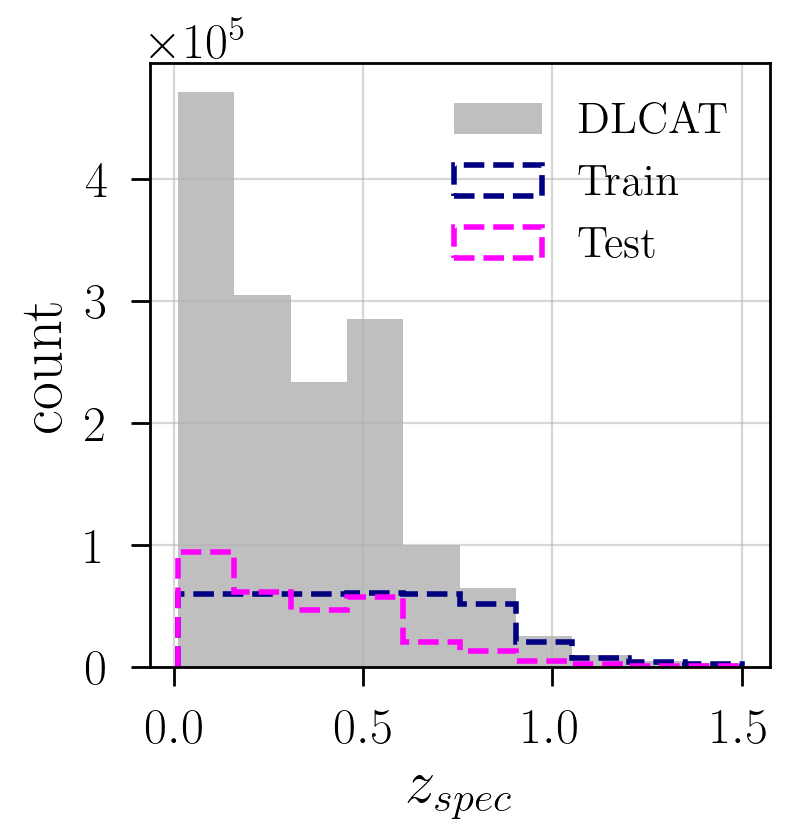

In [9]:
plt_style()
fig, ax = plt.subplots(figsize=(4,4), dpi=200)
fontsize = 22
tick_font = 18

ax.hist(DLCAT['Z'], histtype='bar', ls='--', color='grey', lw=2, alpha=.5, label="DLCAT")
ax.hist(DLTRAIN_A['Z'], histtype='step', ls='--', color='navy', lw=2, label="Train")
ax.hist(TEST_DATA['Z'], histtype='step', ls='--', color='magenta', lw=2, label="Test")

ax.tick_params(axis='both', which='major', labelsize=tick_font)

ax.set_xlabel('$z_{spec}$', fontsize=fontsize)
ax.set_ylabel('count', fontsize=fontsize)
ax.grid(alpha=.5)
ax.yaxis.get_offset_text().set_fontsize(tick_font)
plt.legend(fontsize=16)
plt.savefig(mkdir('/tf/ProjectGabriel/zpholia/random/')+'DLCAT_HIST.pdf', bbox_inches='tight')

In [4]:
MATCHED_DIR = mkdir('/tf/astrodados/DELVE_DR2_Xmatch_specz/')   

delve_dr2_data = open_fits_catalog(MATCHED_DIR+'DELVE_DR2_SPECZ_EXTMAG_SET2023.fits')

In [ ]:
len(delve_dr2_data), len(DLCAT), len(DLCAT)/

In [59]:
len(DLTRAIN_A), len(DLTRAIN_B), len(DLTRAIN_C)

(384305, 857823, 1202597)

In [ ]:
len()

In [65]:
len(DLCAT)

1503422

In [67]:
len(TEST_DATA)

300825

In [68]:
1202597+300825

1503422

In [8]:
plt_style()
%matplotlib inline

# time and space PDF scale

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

In [33]:
def plt_style():
    plt.rcParams.update({
                        'lines.linewidth':1.0,
                        'lines.linestyle':'-',
                        'lines.color':'black',
                        'font.family':'serif',
                        'font.weight':'normal',
                        'font.size':22.0,
                        'text.color':'black',
                        'text.usetex':True,
                        'axes.edgecolor':'black',
                        'axes.linewidth':1.0,
                        'axes.grid':False,
                        'axes.titlesize':'x-large',
                        'axes.labelsize':'x-large',
                        'axes.labelweight':'normal',
                        'axes.labelcolor':'black',
                        'axes.formatter.limits':[-4,4],
                        'xtick.major.size':7,
                        'xtick.minor.size':4,
                        'xtick.major.pad':8,
                        'xtick.minor.pad':8,
                        'xtick.labelsize':'medium',
                        'xtick.minor.width':1.0,
                        'xtick.major.width':1.0,
                        'ytick.major.size':7,
                        'ytick.minor.size':4,
                        'ytick.major.pad':8,
                        'ytick.minor.pad':8,
                        'ytick.labelsize':'medium',
                        'ytick.minor.width':1.0,
                        'ytick.major.width':1.0,
                        'legend.numpoints':1,
                        #'legend.fontsize':'x-large',
                        'legend.shadow':False,
                        'legend.frameon':False})

In [35]:
table = pd.read_csv('../PDF_compression_time_comparison.csv')

In [36]:
nobjs = np.array(table['n_objs'])
mag2param_time = np.array(table['mag_to_60params_time'])
latent2param_time = np.array(table['latent_to_60params_time'])

size10 = np.array([os.path.getsize(f'../10params_{nob}_obj.fits') for nob in nobjs])/1024/1024 #Mbytes
size60 =np.array([os.path.getsize(f'../60params_{nob}_obj.fits') for nob in nobjs])/1024/1024 #Mbytes



30.43135166168213

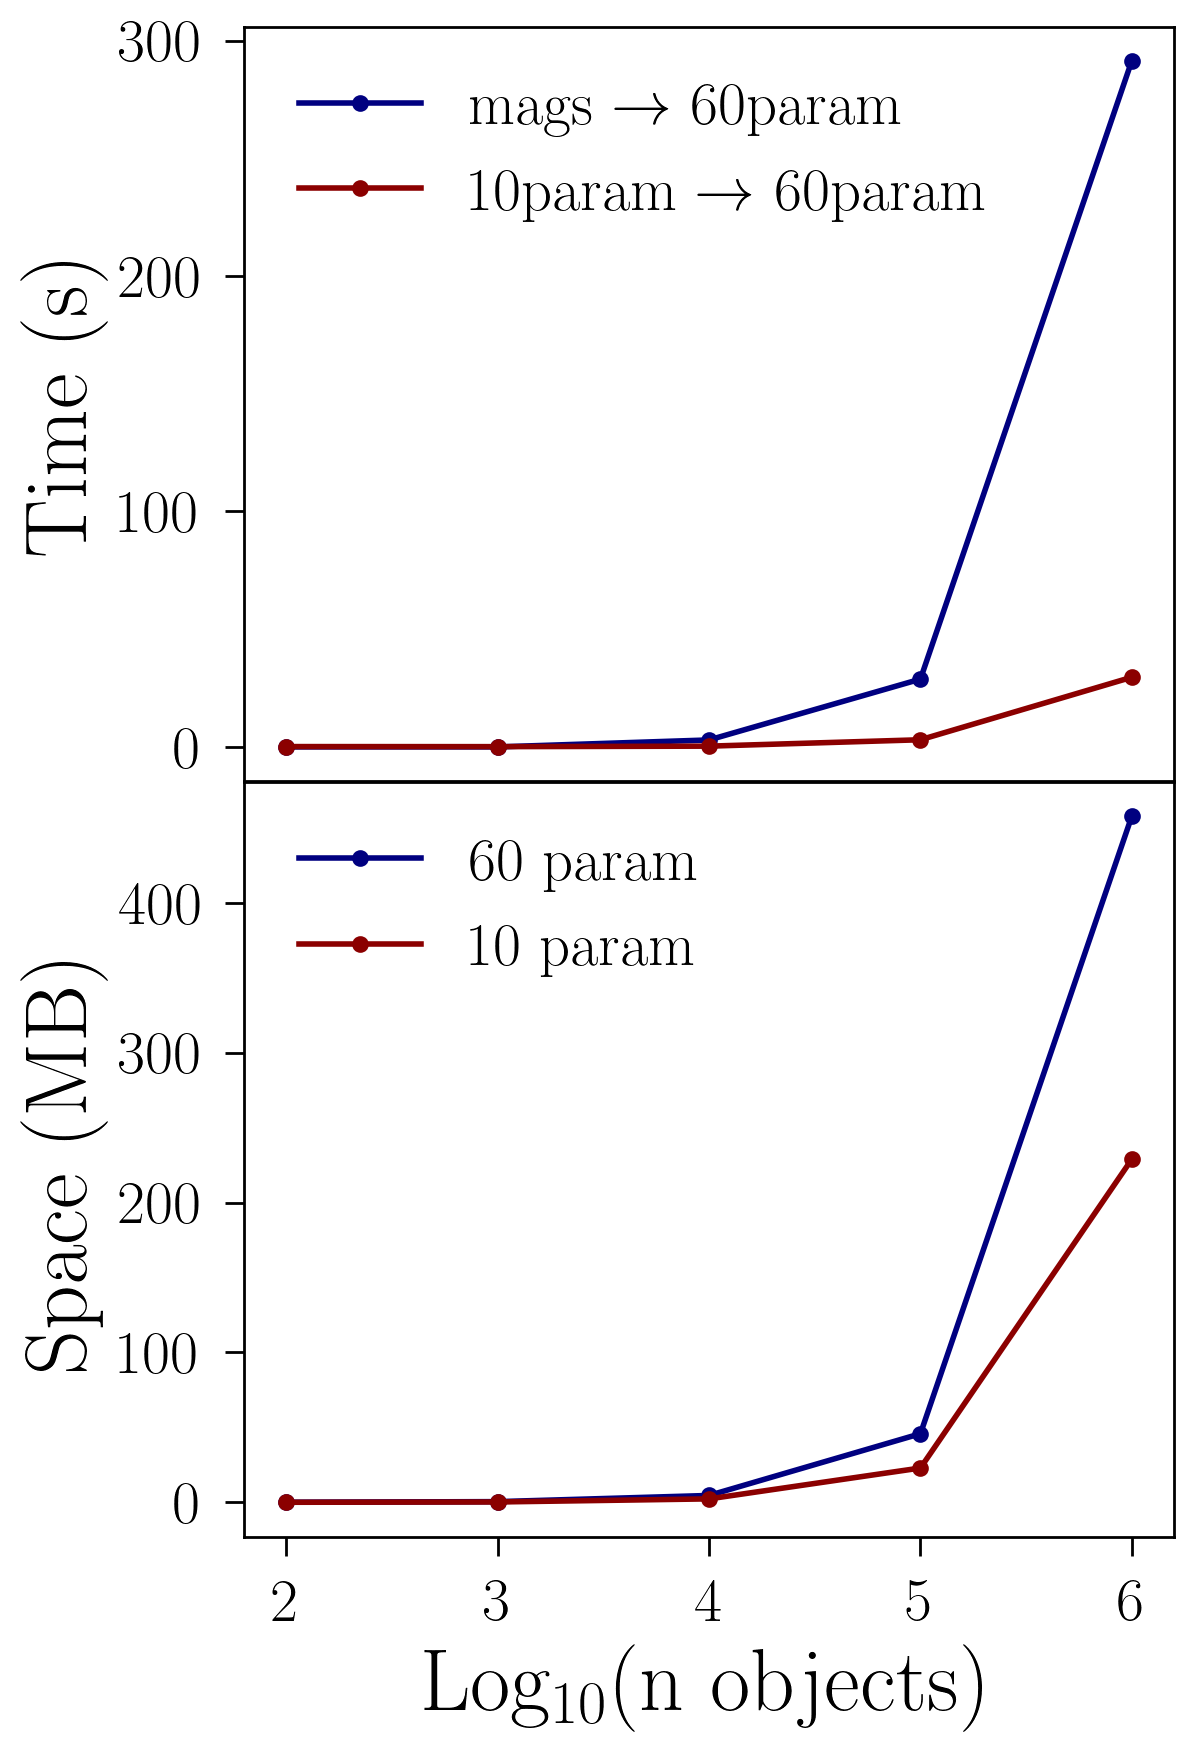

In [57]:
%matplotlib inline
plt_style()
# plt.figure(figsize=(9,8), dpi=200)
fig, axs = plt.subplots(figsize=(6,10), nrows=2, ncols=1, dpi=200)
plt.subplots_adjust(hspace=0.001)

axs[0].plot(np.log10(nobjs), mag2param_time, label='mags $\\rightarrow$ 60param', marker='.', color='navy', lw=2, ms=10)
axs[0].plot(np.log10(nobjs), latent2param_time, label='10param $\\rightarrow$ 60param', marker='.', color='darkred', lw=2, ms=10)
# axs[0].set_xlabel('Log$_{10}$(n objects)')
axs[0].set_ylabel('Time (s)')
# i=0
# ax.annotate(f'60p - {size60[i]:.0f} Kb', xy=(np.log10(nobjs)[i],20), xycoords='data', color='navy')
# ax.annotate(f'10p - {size10[i]:.0f} Kb', xy=(np.log10(nobjs)[i],20-3), xycoords='data', color='darkred')
axs[1].plot(np.log10(nobjs), size60, label='60 param', marker='.', color='navy', lw=2, ms=10)
axs[1].plot(np.log10(nobjs), size10, label='10 param', marker='.', color='darkred', lw=2, ms=10)
axs[1].set_xlabel('Log$_{10}$(n objects)')
axs[1].set_ylabel('Space (MB)')


plt.setp(axs[0].get_xticklabels(), visible=False)
axs[1].sharex(axs[0])
axs[0].legend()
axs[1].legend()

# fig.tight_layout()
plt.savefig('/tf/ProjectGabriel/photoz_paper/Plots/paper/results/'+'time_space_compact.pdf', bbox_inches='tight')

# many things

In [9]:
i=1
with open('test_file.txt', 'a') as f:
    f.write(f'nova_linha_{i}\n')
    f.close()

In [26]:
int(f'{5205:010d}')

5205

In [27]:
class Test:
    def __init__(self, a, b, c):
        self.a = a

In [33]:
from astropy.io import fits

from astropy.table import Table


def open_fits_catalog(fits_file):
    """
    Return de table version of the fits catalog.

    Parameters:
    fits_file (str): catalog path.
    
    Returns:
    fits Table: Table catalog 
    """
    
    hdu_list=fits.open(fits_file, ignore_missing_end=True)
    #print hdu_list
    hdu = hdu_list[1]    # table extensions can't be the first extension, so there's a dummy image extension at 0
    #print hdu.header
    cat_table = Table(hdu.data)
    cols=hdu.columns
    return cat_table

In [34]:
DESI_DR1_PATH = '/tf/astrodados/DESi_EDR/'

DESI_CATALOG_FILES = [DESI_DR1_PATH + 'DESi_EDR.fits'][0]
data = open_fits_catalog(DESI_CATALOG_FILES)

In [35]:
data.info

<Table length=2044588>
       name        dtype 
----------------- -------
         targetid   int64
           survey    str7
          program    str6
          healpix   int64
                z float64
            zwarn   int64
coadd_fiberstatus   int64
         spectype    str6
    mean_fiber_ra float64
   mean_fiber_dec float64
       zcat_nspec   int64
     zcat_primary   int64
      desi_target   int64
  sv1_desi_target   int64
  sv2_desi_target   int64
  sv3_desi_target   int64

In [45]:
def modest_class_mask(catalog_,classes_list=[1,3],sm_key='SPREAD_MODEL_G',smerr_key='SPREADERR_MODEL_G',
                 mag_key='MAG_AUTO_G',wsm_key='WAVG_SPREAD_MODEL_G',
                 return_class='mask'):
    
    """
    MODEST_CLASS star-galaxy classification. Return a mask for the desired classes or an array with the respective classes.
    
    Parameters:
    catalog_ (fits Table): Table catalog
    classes_list (list): desired classes to be masked as True
    sm_key (str): SPREAD_MODEL_{G,R,I,Z} colum name
    smerr_key (str): SPREADERR_MODEL_{G,R,I,Z} colum name
    mag_key (str): MAG_AUTO_{G,R,I,Z} colum name
    wsm_key (str): WAVG_SPREAD_MODEL_{G,R,I,Z} colum name
    return_class (str): 'class' for all the respective classes, 'mask' for the desired classes mask, 'both' for the classes an the mask for the ones of interest
    
    Returns:
    numpy.array or tuple: classes array, mask array or (classes array, mask array) depending on the return_class options, respectively 
    
    The definitions can be seen in table 6 of https://arxiv.org/pdf/1708.01531.pdf
    """
    
    SPREAD = np.array(catalog_[sm_key])
    SPREADERR = np.array(catalog_[smerr_key])
    MAG = np.array(catalog_[mag_key])
    WSM = np.array(catalog_[wsm_key])
    # print(type(SPREAD), type(SPREADERR), type(MAG), type(WSM))
        
    mtype_dic = {'likstar':0 ,
                 'highgal':1 ,
                 'highstar':2 ,
                 'ambigous':3 }
    classes = np.full(len(catalog_), 99).astype('int16')

    for mt in mtype_dic:
        if mt == 'likstar':
            selection = SPREAD + (5/3)*SPREADERR < -0.002
            classes[selection] = mtype_dic[mt]

        elif mt == 'highgal':
            selection = (SPREAD + (5/3)*SPREADERR >0.005) & ~( (np.abs(WSM) < 0.002) & (MAG < 21.5) )
            classes[selection] = mtype_dic[mt]

        elif mt == 'highstar':
            selection = SPREAD + (5/3)*SPREADERR < 0.002
            classes[selection] = mtype_dic[mt]

        elif mt == 'ambigous':
            selection = (SPREAD + (5/3)*SPREADERR > 0.002) & (SPREAD + (5/3)*SPREADERR < 0.005)
            classes[selection] = mtype_dic[mt]
        
    if return_class=='mask':     
        mask = np.full(len(catalog_), False)

        for clas in  classes_list:
            mask += classes == clas

        return mask
    
    elif return_class=='class':

        return classes

    elif return_class=='both':     
        mask = np.full(len(catalog_), False)

        for clas in  classes_list:
            mask += classes == clas

        return classes, mask
    
def mag_g_mask(cat_, maglim=23.5,g_key='MAG_AUTO_G'): 
    
    mask = np.array(cat_[g_key])<maglim
    
    return mask

def flag_g_mask(cat_, flag_key='FLAGS_G', flaglim=3): 
    
    mask = np.array(cat_[flag_key])<flaglim
    
    return mask

In [37]:
data_file = '/tf/dados10T/DESGW/Objects/GW200202_154313/GW200202_154313_C01_SEOBNRv4PHM_objs_EXTCORRMAG.fits'
GW200202_data = open_fits_catalog(data_file)

GW200202_data = GW200202_data[GW200202_data['z']<99]

GW200202_RA = GW200202_data['RA']
GW200202_DEC = GW200202_data['DEC']

In [52]:
mask_gflag = flag_g_mask(GW200202_data)
mask_gmag = mag_g_mask(GW200202_data, maglim=23.5)

In [50]:
sum(mask_gflag)/len(GW200202_data)

0.983948667847338

In [53]:
sum(mask_gmag)/len(GW200202_data)

0.8612986550643266

In [54]:
new_gw_data = GW200202_data[mask_gflag*mask_gmag]

In [55]:
len_GRIZ = sum(GW200202_data['model_GRIZ'] == 1)
len_GRI = sum(GW200202_data['model_GRI'] == 1)
len_GRZ = sum(GW200202_data['model_GRZ'] == 1)

In [60]:
len(GW200202_data)

3438157

In [57]:
len_GRIZ/len(GW200202_data)

0.6153444999748412

In [58]:
len_GRI/len(GW200202_data)

0.08190870864826708

In [59]:
len_GRZ/len(GW200202_data)

0.30274679137689176

In [189]:
data_julia = open_fits_catalog('/tf/astrodados/LegacyDR10_Xmatch_specz/sweep-000m025-005m020spec_match_JULIA.fits')
data_julia.info

<Table length=330>
               name                dtype  shape
--------------------------------- ------- -----
                          RELEASE   int16      
                          BRICKID   int32      
                        BRICKNAME    str8      
                            OBJID   int32      
                             TYPE    str3      
                             RA_1 float64      
                            DEC_1 float64      
                          RA_IVAR float32      
                         DEC_IVAR float32      
                           DCHISQ float32  (5,)
                              EBV float32      
                           FLUX_G float32      
                           FLUX_R float32      
                           FLUX_I float32      
                           FLUX_Z float32      
                          FLUX_W1 float32      
                          FLUX_W2 float32      
                          FLUX_W3 float32      
                     

In [143]:
# data_julia = open_fits_catalog('/tf/astrodados/LegacyDR10_Xmatch_specz/sweep-000m025-005m020spec_match_JULIA.fits')
# data_desi = open_fits_catalog('/tf/astrodados/LegacyDR10_Xmatch_specz/sweep-000m025-005m020spec_match_DESI.fits')
# data_merged = open_fits_catalog('/tf/astrodados/LegacyDR10_Xmatch_specz/sweep-185m035-190m030spec_match_MERGED.fits')

data_all = open_fits_catalog('/tf/astrodados/LegacyDR10_Xmatch_specz/LEGACY_DR10_SPECZ_MATCH_02SET2023.fits')


In [144]:
len(np.unique(data_all['OBJID'])) - len(data_all['OBJID'])

-1081013

In [145]:
len(data_all)

1099655

In [150]:
len(data_all['Z'][data_all['Z']>.01])

876703

(array([1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00, 2.000e+00, 1.000e+00, 2.000e+00, 6.000e+00, 1.194e+03]),
 array([-7.1344843e+02, -7.0155762e+02, -6.8966681e+02, -6.7777600e+02,
        -6.6588519e+02, -6.5399438e+02, -6.4210358e+02, -6.3021277e+02,
        -6.1832196e+02, -6.0643115e+02, -5.9454034e+02, -5.8264954e+02,
        -5.7075873e+02, -5.5886792e+02, -5

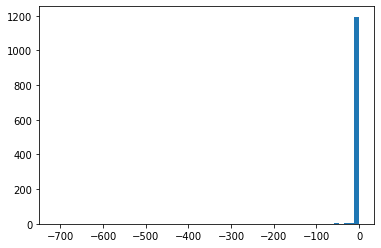

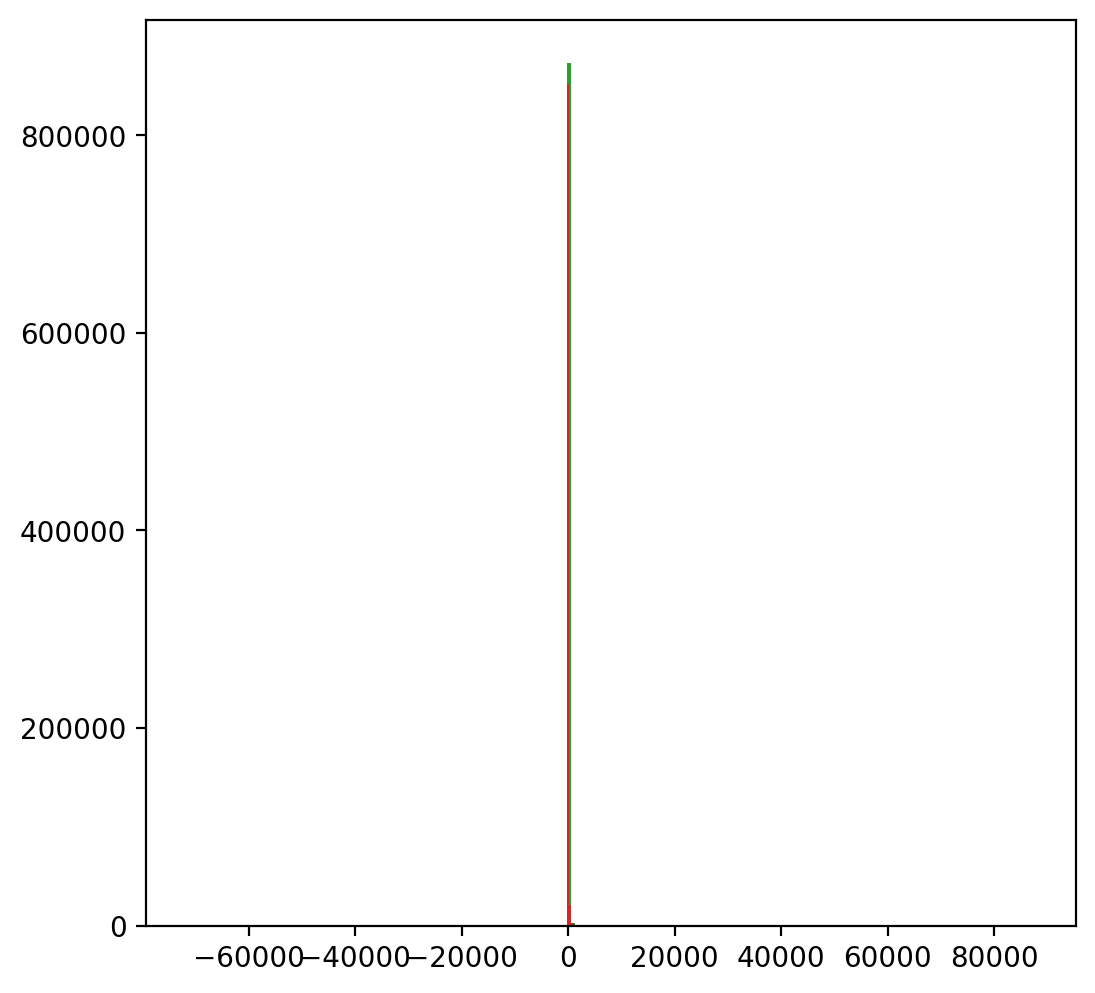

In [161]:
plt.figure(figsize=(6,6), dpi=200)

for flux in ['FLUX_'+i for i in 'GRIZ']:
    plt.hist(data_all[flux][data_all['Z']>.01], bins=200)
    # plt.tight_layout()
# plt.ylim(0,2)
plt.show()

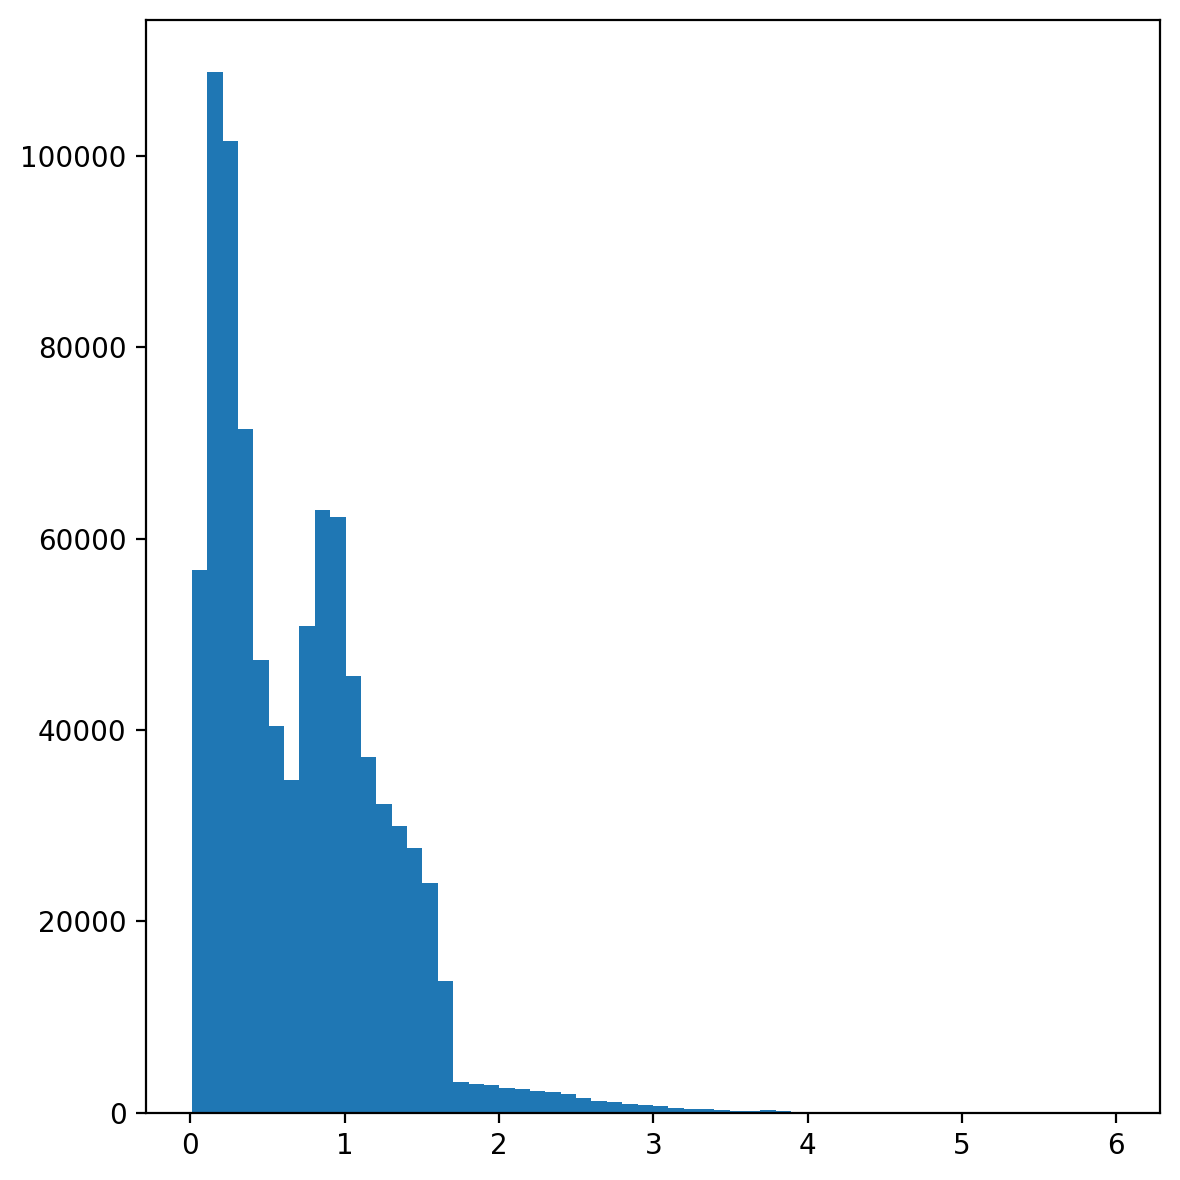

In [151]:
%matplotlib inline 
plt.figure(figsize=(6,6), dpi=200)
plt.hist(data_all['Z'][data_all['Z']>.01], bins=60)
plt.tight_layout()


In [113]:
data_merged

RELEASE,BRICKID,BRICKNAME,OBJID,TYPE,RA_IVAR,DEC_IVAR,DCHISQ,EBV,FLUX_G,FLUX_R,FLUX_I,FLUX_Z,FLUX_W1,FLUX_W2,FLUX_W3,FLUX_W4,FLUX_IVAR_G,FLUX_IVAR_R,FLUX_IVAR_I,FLUX_IVAR_Z,FLUX_IVAR_W1,FLUX_IVAR_W2,FLUX_IVAR_W3,FLUX_IVAR_W4,MW_TRANSMISSION_G,MW_TRANSMISSION_R,MW_TRANSMISSION_I,MW_TRANSMISSION_Z,MW_TRANSMISSION_W1,MW_TRANSMISSION_W2,MW_TRANSMISSION_W3,MW_TRANSMISSION_W4,NOBS_G,NOBS_R,NOBS_I,NOBS_Z,NOBS_W1,NOBS_W2,NOBS_W3,NOBS_W4,RCHISQ_G,RCHISQ_R,RCHISQ_I,RCHISQ_Z,RCHISQ_W1,RCHISQ_W2,RCHISQ_W3,RCHISQ_W4,FRACFLUX_G,FRACFLUX_R,FRACFLUX_I,FRACFLUX_Z,FRACFLUX_W1,FRACFLUX_W2,FRACFLUX_W3,FRACFLUX_W4,FRACMASKED_G,FRACMASKED_R,FRACMASKED_I,FRACMASKED_Z,FRACIN_G,FRACIN_R,FRACIN_I,FRACIN_Z,ANYMASK_G,ANYMASK_R,ANYMASK_I,ANYMASK_Z,ALLMASK_G,ALLMASK_R,ALLMASK_I,ALLMASK_Z,WISEMASK_W1,WISEMASK_W2,PSFSIZE_G,PSFSIZE_R,PSFSIZE_I,PSFSIZE_Z,PSFDEPTH_G,PSFDEPTH_R,PSFDEPTH_I,PSFDEPTH_Z,GALDEPTH_G,GALDEPTH_R,GALDEPTH_I,GALDEPTH_Z,PSFDEPTH_W1,PSFDEPTH_W2,WISE_COADD_ID,SHAPE_R,SHAPE_R_IVAR,SHAPE_E1,SHAPE_E1_IVAR,SHAPE_E2,SHAPE_E2_IVAR,FIBERFLUX_G,FIBERFLUX_R,FIBERFLUX_I,FIBERFLUX_Z,FIBERTOTFLUX_G,FIBERTOTFLUX_R,FIBERTOTFLUX_I,FIBERTOTFLUX_Z,REF_CAT,REF_ID,REF_EPOCH,GAIA_PHOT_G_MEAN_MAG,GAIA_PHOT_G_MEAN_FLUX_OVER_ERROR,GAIA_PHOT_BP_MEAN_MAG,GAIA_PHOT_BP_MEAN_FLUX_OVER_ERROR,GAIA_PHOT_RP_MEAN_MAG,GAIA_PHOT_RP_MEAN_FLUX_OVER_ERROR,GAIA_ASTROMETRIC_EXCESS_NOISE,GAIA_DUPLICATED_SOURCE,GAIA_PHOT_BP_RP_EXCESS_FACTOR,GAIA_ASTROMETRIC_SIGMA5D_MAX,GAIA_ASTROMETRIC_PARAMS_SOLVED,PARALLAX,PARALLAX_IVAR,PMRA,PMRA_IVAR,PMDEC,PMDEC_IVAR,MASKBITS,FITBITS,SERSIC,SERSIC_IVAR,Z,match_source
int16,int32,str8,int32,str3,float32,float32,float32[5],float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int16,int16,int16,int16,int16,int16,int16,int16,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int16,int16,int16,int16,int16,int16,int16,int16,uint8,uint8,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,str8,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,str2,int64,float32,float32,float32,float32,float32,float32,float32,float32,bool,float32,float32,uint8,float32,float32,float32,float32,float32,float32,int32,int16,float32,float32,float64,float64


In [109]:
data_desi['Z'] = data_desi['z']

In [110]:
np.in1d(list(data_julia.columns),list(data_desi.columns)) 

array([ True,  True,  True,  True,  True, False, False,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [100]:
data_julia.info, data_desi.info

(<Table length=330>
                name                dtype  shape
 --------------------------------- ------- -----
                           RELEASE   int16      
                           BRICKID   int32      
                         BRICKNAME    str8      
                             OBJID   int32      
                              TYPE    str3      
                              RA_1 float64      
                             DEC_1 float64      
                           RA_IVAR float32      
                          DEC_IVAR float32      
                            DCHISQ float32  (5,)
                               EBV float32      
                            FLUX_G float32      
                            FLUX_R float32      
                            FLUX_I float32      
                            FLUX_Z float32      
                           FLUX_W1 float32      
                           FLUX_W2 float32      
                           FLUX_W3 float32      


In [72]:
a = pd.read_csv('/tf/astrodados/erik_catalog/SpecZ_Catalogue_20230704.csv')

<ipython-input-72-12f95fc855f3>:1: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  a = pd.read_csv('/tf/astrodados/erik_catalog/SpecZ_Catalogue_20230704.csv')


In [87]:
a

,RA,DEC,z,e_z,f_z,class_spec,original_class_spec,source
0,359.247690,-3.642761,1.599988,8.100903e-09,KEEP(0),QSO,QSO,EXTERNAL_SDSSDR17_BOSS
1,111.514760,1.870567,0.000214,3.002077e-08,KEEP(0),UNCLEAR,NaN,VizieR_J/ApJ/883/175/table4
2,270.803750,-3.020833,0.012098,3.335641e-08,KEEP(SPEC),GALAXY,G,EXTERNAL_NED_2016MNRAS.457.2366S
3,211.814490,-2.025296,0.681416,7.737748e-08,KEEP(0),GALAXY,GALAXY,EXTERNAL_SDSSDR17_BOSS
4,27.793424,-1.384049,2.897109,1.368129e-07,KEEP(0),QSO,QSO,EXTERNAL_SDSSDR17_BOSS
...,...,...,...,...,...,...,...,...
2690200,12.543630,-2.215400,0.171599,2.134810e-04,NaN,GALAXY,G,EXTERNAL_HYPERLEDA
2690201,13.209087,-1.372493,0.112501,2.134810e-04,NaN,GALAXY,G,EXTERNAL_HYPERLEDA
2690202,22.210764,-29.872383,0.080299,2.134810e-04,NaN,GALAXY,G,EXTERNAL_HYPERLEDA
2690203,13.207798,0.031583,0.000400,2.134810e-04,NaN,STAR,S,EXTERNAL_HYPERLEDA


In [86]:
[np.array(a['e_z'].values)[i] is np.float64 for i in range(len(a))]


KeyboardInterrupt: 

In [88]:
Table.from_pandas(pd.read_csv('/tf/astrodados/erik_catalog/SpecZ_Catalogue_20230704.csv')[['RA','DEC','z', 'class_spec']])

<ipython-input-88-e4ecda17cd74>:1: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  Table.from_pandas(pd.read_csv('/tf/astrodados/erik_catalog/SpecZ_Catalogue_20230704.csv')[['RA','DEC','z', 'class_spec']])


RA,DEC,z,class_spec
float64,float64,float64,str17
359.24769,-3.6427608,1.599988,QSO
111.51476,1.870567,0.0002141781698857,UNCLEAR
270.80375,-3.02083333333333,0.0120984030892465,GALAXY
211.81449,-2.0252956,0.6814163,GALAXY
27.793424,-1.384049,2.897109,QSO
203.7833976472,-3.038060822,0.65594494,GALAXY
26.058404,-4.6952009,3.798212,QSO
171.39236,-6.854144,0.6874069,GALAXY
329.12057,2.0414812,1.822652,QSO


In [95]:
np.unique(a['RA'], return_index=True)[1]

array([2192067,  757186, 2092617, ...,  781813, 1852865,  721801])

In [98]:
np.in1d([1,2,3,4,5,6], [6,6])

array([False, False, False, False, False,  True])

In [137]:
data_julia['BRICKID']

216071
216071
198689
196054
216072
216072
198690
198691
198691
194738
194738


In [142]:
np.unique(list(data_julia['BRICKID'])+list([data_desi['BRICKID']])).astype(int)

array([190802, 190803, 190804, 190808, 190809, 190811, 190813, 190814,
       192107, 192109, 192111, 192113, 192115, 192117, 192119, 192121,
       192123, 192124, 193416, 193418, 193422, 193425, 193428, 193430,
       193431, 193433, 194729, 194733, 194735, 194736, 194738, 194739,
       194740, 194741, 194742, 194743, 194744, 194745, 196044, 196045,
       196047, 196048, 196052, 196054, 196055, 196057, 196058, 196059,
       197362, 197363, 197372, 197373, 197375, 197376, 197378, 197379,
       197380, 198682, 198683, 198686, 198689, 198690, 198691, 198693,
       198694, 198695, 198696, 198697, 198699, 198700, 200004, 200005,
       200007, 200008, 200014, 200016, 200017, 200019, 200020, 201333,
       201336, 201340, 201343, 201344, 201346, 201347, 202661, 202663,
       202664, 202667, 202668, 202670, 202675, 203991, 203999, 204000,
       204004, 205321, 205337, 206654, 206655, 206658, 206660, 206664,
       206665, 206669, 206671, 207996, 207997, 207998, 208002, 209333,
      

In [92]:
len(os.listdir('/tf/astrodados/LegacyDR10_Xmatch_specz'))/2

1466.0

In [134]:
list(data_julia['BRICKID'])

[216071,
 216071,
 198689,
 196054,
 216072,
 216072,
 198690,
 198691,
 198691,
 194738,
 194738,
 200014,
 200014,
 192113,
 194735,
 194735,
 194735,
 194735,
 208002,
 208002,
 208002,
 193425,
 193425,
 212025,
 192115,
 192115,
 194736,
 194736,
 206664,
 206664,
 206664,
 206664,
 213372,
 213372,
 213372,
 213372,
 216070,
 216070,
 201340,
 201340,
 201340,
 197372,
 197372,
 202667,
 213371,
 213371,
 212028,
 212028,
 212028,
 212028,
 190808,
 190808,
 196052,
 202668,
 202668,
 194741,
 194741,
 194741,
 194739,
 194739,
 197376,
 197376,
 197376,
 197376,
 197376,
 197376,
 197376,
 197376,
 197376,
 197376,
 197376,
 197376,
 197376,
 190809,
 190809,
 190811,
 190811,
 200016,
 206665,
 206665,
 198695,
 198695,
 193428,
 193428,
 193428,
 193430,
 193430,
 201343,
 201343,
 201343,
 198693,
 198693,
 194742,
 194742,
 216073,
 192119,
 192119,
 192119,
 192119,
 192119,
 200017,
 200017,
 200017,
 200017,
 196057,
 196057,
 196057,
 196057,
 196057,
 196057,
 196057,
 

In [175]:
MATCHED_DIR = '/tf/astrodados/LegacyDR10_Xmatch_specz/'

legacy_data_0 = open_fits_catalog(MATCHED_DIR+'LEGACY_DR10_SPECZ_MATCH_WITH_MAG_03SET2023.fits')

In [186]:
np.sum((legacy_data_0['MAG_Z'] < 24)*(legacy_data_0['MAG_Z'] > 9))

4570205

(array([7.20000e+01, 9.70000e+01, 1.42000e+02, 2.20000e+02, 3.29000e+02,
        5.77000e+02, 7.70000e+02, 1.11000e+03, 1.82600e+03, 3.02200e+03,
        4.59700e+03, 6.55900e+03, 8.81000e+03, 1.10460e+04, 1.42940e+04,
        1.76790e+04, 2.16510e+04, 2.55930e+04, 3.05220e+04, 3.40680e+04,
        3.73140e+04, 3.54140e+04, 3.42250e+04, 3.60040e+04, 3.82800e+04,
        4.05350e+04, 4.49390e+04, 5.07640e+04, 5.62480e+04, 5.97310e+04,
        6.39680e+04, 7.36330e+04, 8.35920e+04, 9.60680e+04, 1.12138e+05,
        1.31850e+05, 1.44931e+05, 1.41596e+05, 1.16000e+05, 1.01021e+05,
        9.01340e+04, 8.29840e+04, 8.44220e+04, 9.27230e+04, 1.02612e+05,
        1.08923e+05, 1.17061e+05, 1.28509e+05, 1.39926e+05, 1.59196e+05,
        1.94726e+05, 2.25357e+05, 2.34944e+05, 2.33877e+05, 2.15451e+05,
        1.47349e+05, 1.37593e+05, 1.38220e+05, 1.11907e+05, 6.19530e+04]),
 array([ 9.00253552,  9.25249313,  9.50245073,  9.75240834, 10.00236594,
        10.25232355, 10.50228115, 10.75223876, 11

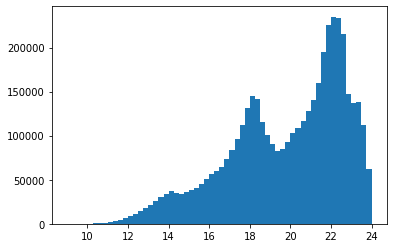

In [180]:
plt.hist(legacy_data_0['MAG_G'][(legacy_data_0['MAG_G'] < 24)*(legacy_data_0['MAG_G'] > 9)], bins=60)

In [193]:
def modest_class_mask(catalog_,classes_list=[1,3],sm_key='SPREAD_MODEL_G',smerr_key='SPREADERR_MODEL_G',
                 mag_key='MAG_AUTO_G',wsm_key='WAVG_SPREAD_MODEL_G',
                 return_class='mask'):
    
    """
    MODEST_CLASS star-galaxy classification. Return a mask for the desired classes or an array with the respective classes.
    
    Parameters:
    catalog_ (fits Table): Table catalog
    classes_list (list): desired classes to be masked as True
    sm_key (str): SPREAD_MODEL_{G,R,I,Z} colum name
    smerr_key (str): SPREADERR_MODEL_{G,R,I,Z} colum name
    mag_key (str): MAG_AUTO_{G,R,I,Z} colum name
    wsm_key (str): WAVG_SPREAD_MODEL_{G,R,I,Z} colum name
    return_class (str): 'class' for all the respective classes, 'mask' for the desired classes mask, 'both' for the classes an the mask for the ones of interest
    
    Returns:
    numpy.array or tuple: classes array, mask array or (classes array, mask array) depending on the return_class options, respectively 
    
    The definitions can be seen in table 6 of https://arxiv.org/pdf/1708.01531.pdf
    """
    
    SPREAD = np.array(catalog_[sm_key])
    SPREADERR = np.array(catalog_[smerr_key])
    MAG = np.array(catalog_[mag_key])
    WSM = np.array(catalog_[wsm_key])
    # print(type(SPREAD), type(SPREADERR), type(MAG), type(WSM))
        
    mtype_dic = {'likstar':0 ,
                 'highgal':1 ,
                 'highstar':2 ,
                 'ambigous':3 }
    classes = np.full(len(catalog_), 99).astype('int16')

    for mt in mtype_dic:
        if mt == 'likstar':
            selection = SPREAD + (5/3)*SPREADERR < -0.002
            classes[selection] = mtype_dic[mt]

        elif mt == 'highgal':
            selection = (SPREAD + (5/3)*SPREADERR >0.005) & ~( (np.abs(WSM) < 0.002) & (MAG < 21.5) )
            classes[selection] = mtype_dic[mt]

        elif mt == 'highstar':
            selection = SPREAD + (5/3)*SPREADERR < 0.002
            classes[selection] = mtype_dic[mt]

        elif mt == 'ambigous':
            selection = (SPREAD + (5/3)*SPREADERR > 0.002) & (SPREAD + (5/3)*SPREADERR < 0.005)
            classes[selection] = mtype_dic[mt]
        
    if return_class=='mask':     
        mask = np.full(len(catalog_), False)

        for clas in  classes_list:
            mask += classes == clas

        return mask
    
    elif return_class=='class':

        return classes

    elif return_class=='both':     
        mask = np.full(len(catalog_), False)

        for clas in  classes_list:
            mask += classes == clas

        return classes, mask

In [ ]:
def hpx2radec(file_path, radius=None, npoints = 100):
    """
    Converts the DELVE healpix name into the healpix coordinates.

    Parameters:
    file_path (str): complete path of the DELVE DR2 file 
    radius (float): size in deg of the radius of the circle entered on the healpix RA and DEC coordinates. 
  
    Returns:
    tuple of lists: lists of points that compose a circle centered on the healpix RA and DEC coordinates, respectively. 
                    If radius==None, returns just the healpix corrdinates.
    
    """
    
    file = file_path.split('/')[-1]#
    hpidx = int(file[file.find('hpx_')+4:file.find('hpx_')+9])    
    theta, phi = hp.pixelfunc.pix2ang(32, hpidx) # pixel encoded in 2^5 = 32 nsize
    ra = np.degrees(phi)
    dec = np.degrees(np.pi/2 - theta)

    if radius:
        R = radius

        param_t = np.linspace(0, np.pi*2, 40)

        bound_ra = np.array([ra]*40)+R*np.cos(param_t)
        bound_dec = np.array([dec]*40)+R*np.sin(param_t)

        bound_dec[bound_dec<-90] = -90
        bound_dec[bound_dec>90] = 90
        return bound_ra, bound_dec
    
    else:
        return ra, dec

In [201]:
GW200202_CATS = ['cat_hpx_08087_phz.fits', 'cat_hpx_07700_phz.fits', 'cat_hpx_08985_phz.fits', 'cat_hpx_08983_phz.fits', 'cat_hpx_08854_phz.fits', 'cat_hpx_07313_phz.fits', 'cat_hpx_06416_phz.fits', 'cat_hpx_06032_phz.fits', 'cat_hpx_07698_phz.fits', 'cat_hpx_07954_phz.fits', 'cat_hpx_08214_phz.fits', 'cat_hpx_08340_phz.fits', 'cat_hpx_09114_phz.fits', 'cat_hpx_07442_phz.fits', 'cat_hpx_06928_phz.fits', 'cat_hpx_06672_phz.fits', 'cat_hpx_08468_phz.fits', 'cat_hpx_08211_phz.fits', 'cat_hpx_09111_phz.fits', 'cat_hpx_07829_phz.fits', 'cat_hpx_08855_phz.fits', 'cat_hpx_06929_phz.fits', 'cat_hpx_07958_phz.fits', 'cat_hpx_07314_phz.fits', 'cat_hpx_08342_phz.fits', 'cat_hpx_08344_phz.fits', 'cat_hpx_09368_phz.fits', 'cat_hpx_07059_phz.fits', 'cat_hpx_08600_phz.fits', 'cat_hpx_06159_phz.fits', 'cat_hpx_08213_phz.fits', 'cat_hpx_08343_phz.fits', 'cat_hpx_08474_phz.fits', 'cat_hpx_08473_phz.fits', 'cat_hpx_07830_phz.fits', 'cat_hpx_08598_phz.fits', 'cat_hpx_08602_phz.fits', 'cat_hpx_07828_phz.fits', 'cat_hpx_07699_phz.fits', 'cat_hpx_06800_phz.fits', 'cat_hpx_06930_phz.fits', 'cat_hpx_06673_phz.fits', 'cat_hpx_08859_phz.fits', 'cat_hpx_07184_phz.fits', 'cat_hpx_08731_phz.fits', 'cat_hpx_08601_phz.fits', 'cat_hpx_08086_phz.fits', 'cat_hpx_07443_phz.fits', 'cat_hpx_08215_phz.fits', 'cat_hpx_08727_phz.fits', 'cat_hpx_07826_phz.fits', 'cat_hpx_08345_phz.fits', 'cat_hpx_07956_phz.fits', 'cat_hpx_06415_phz.fits', 'cat_hpx_06803_phz.fits', 'cat_hpx_09113_phz.fits', 'cat_hpx_07955_phz.fits', 'cat_hpx_06674_phz.fits', 'cat_hpx_07187_phz.fits', 'cat_hpx_06289_phz.fits', 'cat_hpx_06160_phz.fits', 'cat_hpx_07057_phz.fits', 'cat_hpx_08084_phz.fits', 'cat_hpx_07060_phz.fits', 'cat_hpx_07571_phz.fits', 'cat_hpx_08729_phz.fits', 'cat_hpx_08599_phz.fits', 'cat_hpx_08597_phz.fits', 'cat_hpx_08086_phz.fits', 'cat_hpx_07572_phz.fits', 'cat_hpx_08728_phz.fits', 'cat_hpx_08982_phz.fits', 'cat_hpx_07185_phz.fits', 'cat_hpx_06801_phz.fits', 'cat_hpx_07315_phz.fits', 'cat_hpx_07957_phz.fits', 'cat_hpx_08603_phz.fits', 'cat_hpx_08212_phz.fits', 'cat_hpx_08857_phz.fits', 'cat_hpx_07188_phz.fits', 'cat_hpx_07441_phz.fits', 'cat_hpx_07570_phz.fits', 'cat_hpx_08725_phz.fits', 'cat_hpx_08986_phz.fits', 'cat_hpx_08471_phz.fits', 'cat_hpx_08726_phz.fits', 'cat_hpx_07058_phz.fits', 'cat_hpx_08341_phz.fits', 'cat_hpx_07697_phz.fits', 'cat_hpx_08858_phz.fits', 'cat_hpx_06931_phz.fits', 'cat_hpx_08470_phz.fits', 'cat_hpx_07444_phz.fits', 'cat_hpx_08085_phz.fits', 'cat_hpx_09241_phz.fits', 'cat_hpx_07316_phz.fits', 'cat_hpx_06417_phz.fits', 'cat_hpx_08469_phz.fits', 'cat_hpx_08083_phz.fits', 'cat_hpx_09369_phz.fits', 'cat_hpx_06802_phz.fits', 'cat_hpx_09240_phz.fits', 'cat_hpx_08730_phz.fits', 'cat_hpx_06544_phz.fits', 'cat_hpx_08472_phz.fits', 'cat_hpx_07701_phz.fits', 'cat_hpx_09239_phz.fits', 'cat_hpx_09112_phz.fits', 'cat_hpx_07573_phz.fits', 'cat_hpx_07827_phz.fits', 'cat_hpx_06545_phz.fits', 'cat_hpx_06288_phz.fits', 'cat_hpx_08856_phz.fits', 'cat_hpx_06546_phz.fits', 'cat_hpx_08984_phz.fits', 'cat_hpx_07186_phz.fits']
GW200202_FILES = ['/tf/astrodados/DELVE_DR2_cleaned/'+fit for fit in GW200202_CATS]

In [ ]:
GW190924_CATS = ['cat_hpx_06849.fits', 'cat_hpx_07489.fits', 'cat_hpx_06336.fits', 'cat_hpx_06208.fits', 'cat_hpx_07232.fits', 'cat_hpx_06721.fits', 'cat_hpx_06719.fits', 'cat_hpx_06465.fits', 'cat_hpx_06464.fits', 'cat_hpx_06978.fits', 'cat_hpx_07745.fits', 'cat_hpx_06976.fits', 'cat_hpx_06209.fits', 'cat_hpx_06593.fits', 'cat_hpx_07361.fits', 'cat_hpx_07234.fits', 'cat_hpx_07617.fits', 'cat_hpx_07233.fits', 'cat_hpx_06720.fits', 'cat_hpx_07360.fits', 'cat_hpx_07616.fits', 'cat_hpx_06977.fits', 'cat_hpx_06975.fits', 'cat_hpx_07104.fits', 'cat_hpx_07490.fits', 'cat_hpx_06080.fits', 'cat_hpx_07746.fits', 'cat_hpx_07105.fits', 'cat_hpx_06592.fits', 'cat_hpx_06848.fits', 'cat_hpx_06463.fits']

In [202]:
GW200202_FILES

['/tf/astrodados/DELVE_DR2_cleaned/cat_hpx_08087_phz.fits',
 '/tf/astrodados/DELVE_DR2_cleaned/cat_hpx_07700_phz.fits',
 '/tf/astrodados/DELVE_DR2_cleaned/cat_hpx_08985_phz.fits',
 '/tf/astrodados/DELVE_DR2_cleaned/cat_hpx_08983_phz.fits',
 '/tf/astrodados/DELVE_DR2_cleaned/cat_hpx_08854_phz.fits',
 '/tf/astrodados/DELVE_DR2_cleaned/cat_hpx_07313_phz.fits',
 '/tf/astrodados/DELVE_DR2_cleaned/cat_hpx_06416_phz.fits',
 '/tf/astrodados/DELVE_DR2_cleaned/cat_hpx_06032_phz.fits',
 '/tf/astrodados/DELVE_DR2_cleaned/cat_hpx_07698_phz.fits',
 '/tf/astrodados/DELVE_DR2_cleaned/cat_hpx_07954_phz.fits',
 '/tf/astrodados/DELVE_DR2_cleaned/cat_hpx_08214_phz.fits',
 '/tf/astrodados/DELVE_DR2_cleaned/cat_hpx_08340_phz.fits',
 '/tf/astrodados/DELVE_DR2_cleaned/cat_hpx_09114_phz.fits',
 '/tf/astrodados/DELVE_DR2_cleaned/cat_hpx_07442_phz.fits',
 '/tf/astrodados/DELVE_DR2_cleaned/cat_hpx_06928_phz.fits',
 '/tf/astrodados/DELVE_DR2_cleaned/cat_hpx_06672_phz.fits',
 '/tf/astrodados/DELVE_DR2_cleaned/cat_h

In [216]:
8339060 - 2962384

5376676

In [214]:
GW200202_DATA = open_fits_catalog('/tf/dados10T/DESGW/Objects/GW200202_154313/GW200202_154313_C01_SEOBNRv4PHM_objs_EXTCORRMAG.fits')
# GW190924__DATA = open_fits_catalog('/tf/dados10T/DESGW/Objects/GW190924_021846/GW190924_021846_objs.fits')
# GW200202_154313
# GW190924_021846
# GW200202_154313_C01_SEOBNRv4PHM_objs_EXTCORRMAG.fits
# '/tf/dados10T/DESGW/Objects/'

In [215]:
GW200202_DATA.info

<Table length=8339060>
      name        dtype  shape
---------------- ------- -----
 QUICK_OBJECT_ID   int64      
              RA float64      
             DEC float64      
      MAG_AUTO_G float32      
      MAG_AUTO_R float32      
      MAG_AUTO_I float32      
      MAG_AUTO_Z float32      
   MAGERR_AUTO_G float32      
   MAGERR_AUTO_R float32      
   MAGERR_AUTO_I float32      
   MAGERR_AUTO_Z float32      
    EXTINCTION_G float32      
    EXTINCTION_R float32      
    EXTINCTION_I float32      
    EXTINCTION_Z float32      
         FLAGS_G   int16      
         FLAGS_R   int16      
         FLAGS_I   int16      
         FLAGS_Z   int16      
EXTENDED_CLASS_G   int16      
EXTENDED_CLASS_R   int16      
EXTENDED_CLASS_I   int16      
EXTENDED_CLASS_Z   int16      
      flag_nband   int16      
       flag_sn10   int16      
  flag_color_cut   int16      
        training   int16      
               z float64      
            zerr float64      
        z_median

# chances plots

In [26]:
import numpy as np
import pandas as pd 
import os
import matplotlib.pyplot as plt

from astropy.io import fits

from astropy.table import Table


def open_fits_catalog(fits_file):
    """
    Return de table version of the fits catalog.

    Parameters:
    fits_file (str): catalog path.
    
    Returns:
    fits Table: Table catalog 
    """
    
    hdu_list=fits.open(fits_file, ignore_missing_end=True)
    #print hdu_list
    hdu = hdu_list[1]    # table extensions can't be the first extension, so there's a dummy image extension at 0
    #print hdu.header
    cat_table = Table(hdu.data)
    cols=hdu.columns
    return cat_table

def plt_style():
    plt.rcParams.update({
                        'lines.linewidth':1.0,
                        'lines.linestyle':'-',
                        'lines.color':'black',
                        'font.family':'serif',
                        'font.weight':'normal',
                        'font.size':22.0,
                        'text.color':'black',
                        'text.usetex':True,
                        'axes.edgecolor':'black',
                        'axes.linewidth':1.0,
                        'axes.grid':False,
                        'axes.titlesize':'x-large',
                        'axes.labelsize':'x-large',
                        'axes.labelweight':'normal',
                        'axes.labelcolor':'black',
                        'axes.formatter.limits':[-4,4],
                        'xtick.major.size':7,
                        'xtick.minor.size':4,
                        'xtick.major.pad':8,
                        'xtick.minor.pad':8,
                        'xtick.labelsize':'medium',
                        'xtick.minor.width':1.0,
                        'xtick.major.width':1.0,
                        'ytick.major.size':7,
                        'ytick.minor.size':4,
                        'ytick.major.pad':8,
                        'ytick.minor.pad':8,
                        'ytick.labelsize':'medium',
                        'ytick.minor.width':1.0,
                        'ytick.major.width':1.0,
                        'legend.numpoints':1,
                        #'legend.fontsize':'x-large',
                        'legend.shadow':True,
                        'legend.frameon':False})

In [3]:
legacy_train_data = pd.read_csv('/tf/astrodados/Datasets/Legacy_DR10_train_flat_GRIZ.csv')
legacy_test_data = pd.read_csv('/tf/astrodados/Datasets/Legacy_DR10_test_flat_GRIZ.csv')
legacy_extra_data = pd.read_csv('/tf/astrodados/Datasets/Legacy_DR10_extra_flat_GRIZ.csv')


Text(0, 0.5, '$mag_g-mag_r$')

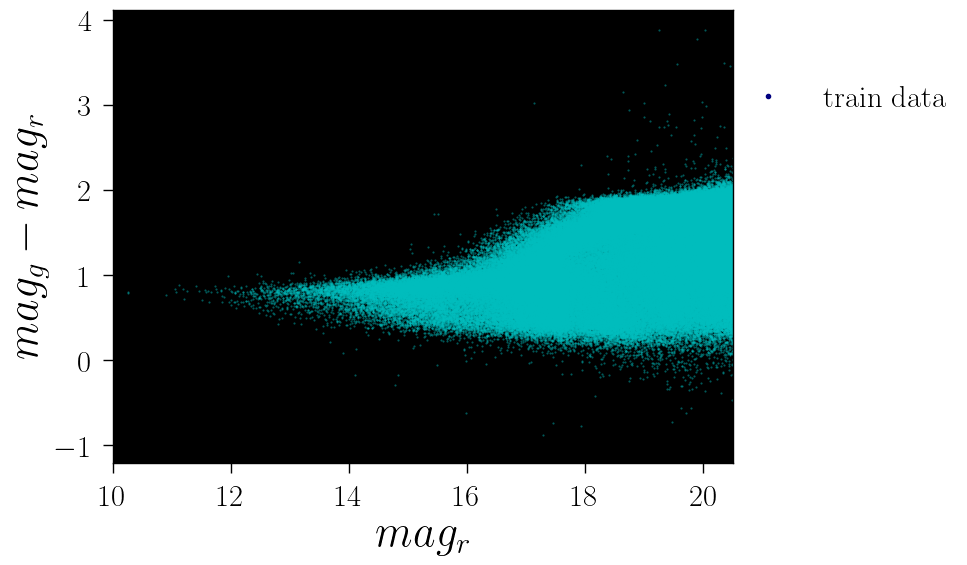

In [80]:
import matplotlib.lines as mlines
plt_style()
fig, ax = plt.subplots(figsize=(8,6), dpi=100)

ax.plot(legacy_train_data['MAG_R'],legacy_train_data['MAG_G-MAG_R'], marker='o', ms=.5, ls='', label='train data', c='c', alpha=.5)
# ax.plot(legacy_test_data['MAG_R'],legacy_test_data['MAG_G-MAG_R'], marker='o', ms=.2, ls='', label='test data', c='c')
# ax.plot(legacy_extra_data['MAG_R'],legacy_extra_data['MAG_G-MAG_R'], marker='o', ms=.01, ls='', label='extra data (not used)')

handles, labels = ax.get_legend_handles_labels()

handles[0] = mlines.Line2D([],[],ls='',markersize=3, marker='o', color='navy')
# handles[1] = mlines.Line2D([],[],ls='',markersize=3, marker='o', color='c')

fig.legend(labels=labels,handles=handles,bbox_to_anchor=(1.2,0.8))
ax.set_facecolor('black')
ax.set_xlim(10,20.5)
ax.set_xlabel('$mag_r$')
ax.set_ylabel('$mag_g-mag_r$')

In [59]:
trainable_data = pd.read_csv('/tf/astrodados/Datasets/LEGACY_DR10_SPECZ_MATCH_TRAINABLE.csv')

Text(0, 0.5, 'n obj')

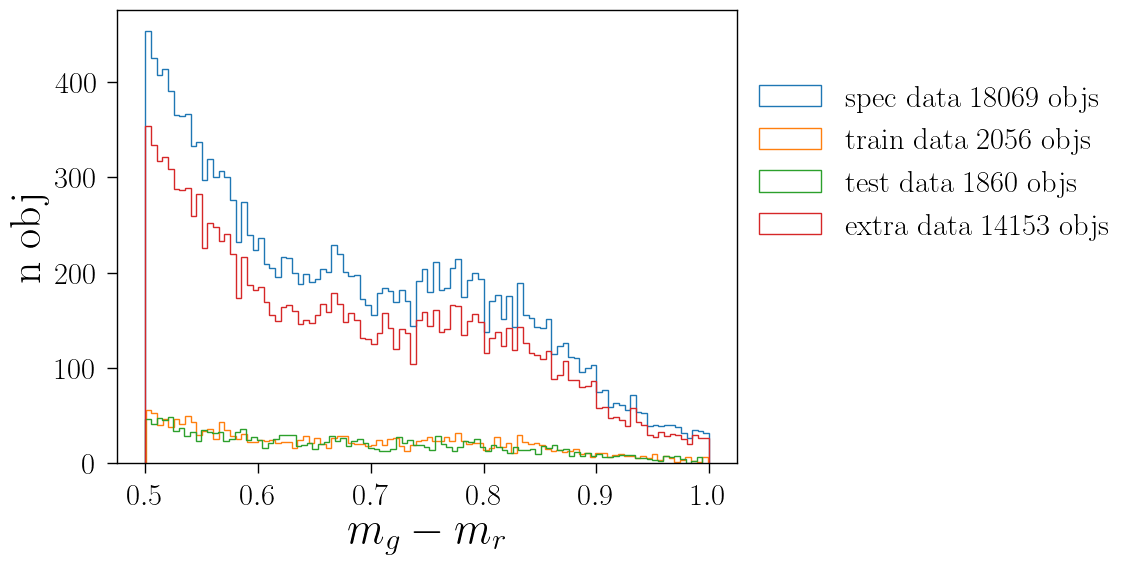

In [101]:
import matplotlib.lines as mlines
plt_style()
fig, ax = plt.subplots(figsize=(8,6), dpi=100)



cut_allspec = (trainable_data['MAG_R']>18)*(trainable_data['Z']<.1)*(trainable_data['MAG_R']<21)*(trainable_data['MAG_G']-trainable_data['MAG_R']<1)*(trainable_data['MAG_G']-trainable_data['MAG_R']>.5)
cut_train_data = (legacy_train_data['MAG_R']>18)*(legacy_train_data['Z']<.1)*(legacy_train_data['MAG_R']<21)*(legacy_train_data['MAG_G']-legacy_train_data['MAG_R']<1)*(legacy_train_data['MAG_G']-legacy_train_data['MAG_R']>.5)
cut_test_data = (legacy_test_data['MAG_R']>18)*(legacy_test_data['Z']<.1)*(legacy_test_data['MAG_R']<21)*(legacy_test_data['MAG_G']-legacy_test_data['MAG_R']<1)*(legacy_test_data['MAG_G']-legacy_test_data['MAG_R']>.5)
cut_extra_data = (legacy_extra_data['MAG_R']>18)*(legacy_extra_data['Z']<.1)*(legacy_extra_data['MAG_R']<21)*(legacy_extra_data['MAG_G']-legacy_extra_data['MAG_R']<1)*(legacy_extra_data['MAG_G']-legacy_extra_data['MAG_R']>.5)



ax.hist(trainable_data['MAG_G'][cut_allspec]-trainable_data['MAG_R'][cut_allspec],bins=100,histtype='step', label=f'spec data {np.sum(cut_allspec)} objs')
ax.hist(legacy_train_data['MAG_G'][cut_train_data]-legacy_train_data['MAG_R'][cut_train_data],bins=100,histtype='step', label=f'train data {np.sum(cut_train_data)} objs')

ax.hist(legacy_test_data['MAG_G'][cut_test_data]-legacy_test_data['MAG_R'][cut_test_data],bins=100,histtype='step', label=f'test data {np.sum(cut_test_data)} objs')
ax.hist(legacy_extra_data['MAG_G'][cut_extra_data]-legacy_extra_data['MAG_R'][cut_extra_data],bins=100,histtype='step', label=f'extra data {np.sum(cut_extra_data)} objs')

# ax.hist(legacy_test_data['MAG_R'],bins=100,histtype='step', label='test data', density=True)
# ax.hist(trainable_data['MAG_R'],bins=100,histtype='step', label='trainable specz', density=True)
# ax.plot(legacy_extra_data['MAG_R'],legacy_extra_data['MAG_G-MAG_R'], marker='o', ms=.01, ls='', label='extra data (not used)')

handles, labels = ax.get_legend_handles_labels()

# handles[0] = mlines.Line2D([],[],ls='',markersize=3, marker='o', color='navy')
# handles[1] = mlines.Line2D([],[],ls='',markersize=3, marker='o', color='c')
# ax.axvline(0.6)
# ax.axvline(0.85)

fig.legend(labels=labels,handles=handles,bbox_to_anchor=(1.4,0.8))
# ax.set_facecolor('white')
# ax.set_xlim(10,20.5)
ax.set_xlabel('$m_g-m_r$')
ax.set_ylabel('n obj')